<table width="100%"><tr><td style="color:#bbbbbb;background-color:#ffffff;font-size:11px;font-style:italic;text-align:right;"></td></tr></table>
$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\dot}[2]{ #1 \cdot #2} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\stateplus}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\stateminus}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $
$ \newcommand{\pstate}[1]{ \lceil \mspace{-1mu} #1 \mspace{-1.5mu} \rfloor } $

<center>
<img src="https://media.discordapp.net/attachments/1126231743641428109/1138188172694650941/image.png?width=960&height=473">

    
## <center> QUANTUM SCHOLARS 2023


Autores: [Ricardo Quispe M.](https://github.com/RcrdPhysics).\, Tony Milla y Gustavo Valdivia
Institución: QuantumQuipu, Universidad Nacional Mayor de San Marcos\
Correo: ricardo.quispe5@unmsm.edu.pe, tony.milla@unmsm.edu.pe, gvaldiviamera@uh.edu
    
Este material está sujeto a los términos y condiciones de la licencia [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Se permite el uso gratuito para cualquier propósito no comercial.

*También puede consultar la última versión de este notebook en nuestro [repositorio](https://github.com/QuantumQuipu/QuantumScholars2023) y los videos de clase [en nuestro canal de Youtube](https://www.youtube.com/@quantumquipu-unmsm1091/streams).*
    

Indicaciones:

1.- Este notebook deberá ser enviado a través del siguiente formulario: https://forms.gle/LRtmmhvZZ85Cuq5t9

2.- Fecha de entrega miércoles 16 de Agosto a las 18Hrs GMT-5

3.- Deberá adjuntar toda su solución en un solo notebook. (Ya sea cálculos a mano en formato imagen, o visualizaciones externas)

4.- Los problemas extra pueden reemplazar a cualquier problema dentro de la misma clase.



## Clase 1-2:

1.- ¿Cuál es el vector de estado de un sistema compuesto por 3 qubits , estando los qubits individuales(e independientes) en los estados  $|+\rangle $ , $|+\rangle $,$| -\rangle $,? Luego hacer las mediciones parciales para el qubit central, repetir lo mismo con qiskit.

2.- ¿Cuántos qubits independientes tiene como mínimo el siguiente sistema?

<center>
<img src="https://raw.githubusercontent.com/tonymilla/QuantumScholars2023/main/imagenes/examen/q_spherequestion.png">

3.- ¿Cómo se escribiría en notación de Dirac una compuerta CU3 desarrollalo e implementalo en qiskit para $\theta = \pi$, $\phi = \frac{\pi}{2}$ y $\lambda = \frac{7\pi}{2}$ 

In [1]:
from qiskit.visualization import array_to_latex
from qiskit.quantum_info import Statevector 
from qiskit.visualization import plot_bloch_multivector
from qiskit.visualization import plot_state_qsphere
from qiskit.quantum_info import random_statevector
from qiskit import QuantumCircuit
from qiskit import QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_histogram
from qiskit import execute, Aer
from qiskit.circuit.library import XGate,ZGate
from numpy import pi

In [8]:
import numpy as np
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor

## Brian Gabriel Barajas Guerrero
### bgbg5530@gmail.com

### Respuesta a problema 1, sección 1

Calculo de estado y probabilidades a mano
<img src="https://github.com/BrianBarajas/Quantum_Computing_Codes/blob/14ff63ee5540e03c1b785bc6993f6c3dd35248c3/ProblemasResueltos_QuiPu_Lab/P1_S1.jpg?raw=true">

$\psi_3$ Representa el estado de los 3 Qubits y, seguido de eso, tenemos el calculo de la probabilidad parcial de los estados más a la izquierda, también tenemos las probabilidades respectivas para los estados de la derecha pero no se realizó el calculo completo porque resulta trivial ya que es facil ver que es el mismo calculo que para la izquierda

El estado de tres Qubits $|+\rangle $, $|+\rangle $,$| -\rangle $ es

In [6]:
ket_estado_3Qbits = Statevector.from_label('++-') #No necesitamos escribir los kets + y - explicitos porque son bases conocidas
ket_estado_3Qbits.draw('Latex')

<IPython.core.display.Latex object>

Probabilidades parciales de los estados más a la derecha

In [3]:
probs_ket_3Qbits = ket_estado_3Qbits.probabilities_dict([0])
print('probs: {}'.format(probs_ket_3Qbits))

probs: {'0': 0.4999999999999998, '1': 0.4999999999999998}


Probabilidades parciales de los estados más a la izquierda

In [5]:
probs_ket_3Qbits = ket_estado_3Qbits.probabilities_dict([0])
print('probs: {}'.format(probs_ket_3Qbits))

probs: {'0': 0.4999999999999998, '1': 0.4999999999999998}


### Respuesta a problema 2, sección 1

El sistema tiene como minímo $\textbf{dos}$ qubits con fase 0 apróximadamente

###  Respuesta a problema 3, sección 1

La compuerta control de U3 se vería, en notación de Dirac de la siguiente forma:
$$CU3 = |  0 \rangle \langle 0 | \otimes I + | 1\rangle \langle  1| \otimes U3 $$

Con U3, escrito en notación de Dirac de la siguiente forma:
$$U3 = \cos(\frac{\theta}{2}) |0 \rangle \langle 0 | - e^{i \lambda}\sin(\frac{\theta}{2}) | 0\rangle \langle  1| + e^{i \phi}\sin(\frac{\theta}{2}) | 1\rangle \langle  0| + e^{i(\phi + \lambda)}\cos(\frac{\theta}{2}) | 1\rangle \langle  1| $$

Si $\theta = \pi$, $\phi = \pi /2$ y $\lambda = 7\pi /2$
$$U3 = \cos(\frac{\pi}{2}) |0 \rangle \langle 0 | - e^{i 7\pi /2}\sin(\frac{\pi}{2}) | 0\rangle \langle  1| + e^{i \pi/2}\sin(\frac{\pi}{2}) | 1\rangle \langle  0| + e^{i(\pi/2 + 7\pi /2)}\cos(\frac{\pi}{2}) | 1\rangle \langle  1| $$

$$U3 = - e^{i 7\pi /2} | 0\rangle \langle  1| + e^{i \pi/2} | 1\rangle \langle  0| = - e^{i 3\pi /2} | 0\rangle \langle  1| + e^{i \pi/2} | 1\rangle \langle  0| = -| 0\rangle \langle  1| + e^{i( \pi/2 - 3\pi /2)} | 1\rangle \langle  0| = -| 0\rangle \langle  1| + e^{-i\pi} | 1\rangle \langle  0| $$
Multiplicando por una fase global

Pero tenemos la ecuación de Euler con $e^{-i\pi} = \cos(\pi) - i\sin(\pi) = 1$
Con esto tenemos $$U3= -| 0 \rangle \langle 1 | +| 1 \rangle \langle 0 | $$
Y podemos notar que es muy similar a la compuerta X pero con un cambio en el coeficiente de $|1\rangle$ que sería equivalente a lo que haría la compuerta Z. \
Por lo tanto, U3 con esos valores especifícos para sus angulos es equivalente a hacer una compuerta Z y un X.
$$U3|\psi\rangle = X Z |\psi\rangle $$
Para este caso en particular

Calculo a mano:
<img src="https://github.com/BrianBarajas/Quantum_Computing_Codes/blob/main/ProblemasResueltos_QuiPu_Lab/P3_S1.jpg?raw=true">

#### Implemenntado en qiskit

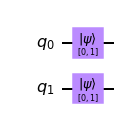

In [12]:
circuito1 = QuantumCircuit(2)
circuito1.initialize(Statevector.from_label("1").data, 0)
circuito1.initialize(Statevector.from_label("1").data, 1)
circuito1.draw("mpl")
#plot_bloch_multivector(circuito1)

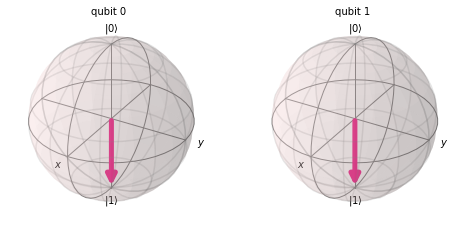

In [13]:
plot_bloch_multivector(circuito1)

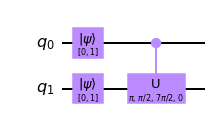

In [14]:
circuito1.cu(pi,pi/2,7*pi/2,0,0,1)
circuito1.draw("mpl")

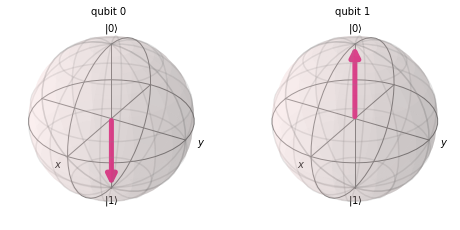

In [15]:
plot_bloch_multivector(circuito1)

## Clase 4-5

4.- A partir de la relación existente entre la operación (módulo 2) y el operador XOR ($\oplus$). Mostrar:

\begin{align}
\sum_{i=1}^n x_iz_i \pmod 2=x_1z_1\oplus x_2z_2\oplus\cdots\oplus x_nz_n
\end{align}

5.- Implementa el código para la función oráculo balanceado con $n=3$, la cual retorna el circuito cuántico qc. Considere que $f(x)$ está dado por:

\begin{align}
f(001)&=0\\
f(000)&=0\\
f(111)&=0\\
f(110)&=0\\
f(011)&=1\\
f(010)&=1\\
f(100)&=1\\
f(101)&=1\\
\end{align}

6.- En la construcción más simple posible de un oráculo balanceado, se utiliza la compuerta $CX$, la cual toma como objetivo el $(n+1)$-ésimo qubit del circuito y como control cada uno de los $n$ primeros qubits. Sin embargo, ¿es realmente necesario aplicar $CX$ a todos los $n$ primeros qubits, o podríamos prescindir de algunos y obtener igualmente un oráculo balanceado?

7.- Implemente el algoritmo de Grover para determinar la máxima cantidad de aristas en un grafo de 5 nodos y 6 aristas:

\begin{align}
(0,3)\\
(0,4)\\
(1,3)\\
(1,4)\\
(2,3)\\
(2,4)\\
\end{align}

8.- En el algoritmo de Grover, determine el número de veces que debe ejercutarse el par $U_\omega U_f$ para que el estado final de nuestro circuito coincida con el Ket de estados deseados sabiendo que $x\in\{0,1\}^5$ y hay 4 estados que sastifacen las características de búsqueda.

Extra 1.- Si

\begin{align}
\ket{\psi3}&=U\omega\ket{\psi_2}\
&=\left(2\ket{s}\bra{s}-\mathbb{I}\right)\left(-\sqrt{\frac{a}{2^n}}\ket{A}+\sqrt{\frac{b}{2^n}}\ket{B}\right)
\end{align}

Usando
\begin{align}
\ket{s}\bra{s}=\frac{a}{2^n}\ket{A}\bra{A}+\frac{b}{2^n}\ket{B}\bra{B}+\frac{\sqrt{ab}}{2^n}\left[\ket{A}\bra{B}+\ket{B}\bra{A}\right]
\end{align}
\begin{align}
&\sin\theta=\sqrt{\frac{a}{2^n}}\
&\cos\theta=\sqrt{\frac{b}{2^n}}
\end{align}

Demuestre:
\begin{align}
\ket{\psi_3}=\sin 3\theta\ket{A}+\cos 3\theta\ket{B}
\end{align}

## Respuestas a la sección 2

### Problema 4, sección 2.

Desarrollo a mano:
<img src="https://github.com/BrianBarajas/Quantum_Computing_Codes/blob/main/ProblemasResueltos_QuiPu_Lab/P1_S2.jpg?raw=true">

### Problema 5, sección 2.

Se verificó a mano que el oraculo cumple las específicacipnes de $f(x)$

In [20]:
oraculo_b = QuantumCircuit(4)

oraculo_b.x(1)
oraculo_b.barrier()

for x in range(3):
    oraculo_b.cx(x,3)

oraculo_b.barrier()
oraculo_b.x(1)
oraculo_b.barrier()

oraculo_b.draw()

░                 ░       ░ 
q_0: ──────░───■─────────────░───────░─
     ┌───┐ ░   │             ░ ┌───┐ ░ 
q_1: ┤ X ├─░───┼────■────────░─┤ X ├─░─
     └───┘ ░   │    │        ░ └───┘ ░ 
q_2: ──────░───┼────┼────■───░───────░─
           ░ ┌─┴─┐┌─┴─┐┌─┴─┐ ░       ░ 
q_3: ──────░─┤ X ├┤ X ├┤ X ├─░───────░─
           ░ └───┘└───┘└───┘ ░       ░

In [25]:
qcc=QuantumCircuit(4,3)
qcc.x(3)
qcc.h(3)
qcc.barrier()

for x in range(3):
    qcc.h(x)
qcc.barrier()

qcc=qcc.compose(oraculo_b)
qcc.barrier

for x in range(3):
    qcc.h(x)
qcc.barrier()

qcc.measure([0,1,2],[0,1,2])
qcc.draw()

░ ┌───┐ ░       ░                 ░       ░ ┌───┐ ░ ┌─┐      
q_0: ───────────░─┤ H ├─░───────░───■─────────────░───────░─┤ H ├─░─┤M├──────
                ░ ├───┤ ░ ┌───┐ ░   │             ░ ┌───┐ ░ ├───┤ ░ └╥┘┌─┐   
q_1: ───────────░─┤ H ├─░─┤ X ├─░───┼────■────────░─┤ X ├─░─┤ H ├─░──╫─┤M├───
                ░ ├───┤ ░ └───┘ ░   │    │        ░ └───┘ ░ ├───┤ ░  ║ └╥┘┌─┐
q_2: ───────────░─┤ H ├─░───────░───┼────┼────■───░───────░─┤ H ├─░──╫──╫─┤M├
     ┌───┐┌───┐ ░ └───┘ ░       ░ ┌─┴─┐┌─┴─┐┌─┴─┐ ░       ░ └───┘ ░  ║  ║ └╥┘
q_3: ┤ X ├┤ H ├─░───────░───────░─┤ X ├┤ X ├┤ X ├─░───────░───────░──╫──╫──╫─
     └───┘└───┘ ░       ░       ░ └───┘└───┘└───┘ ░       ░       ░  ║  ║  ║ 
c: 3/════════════════════════════════════════════════════════════════╩══╩══╩═
                                                                     0  1  2

### Problema 6, sección 2.

Si, deben tomarse los primeros n qubits de un sistema de n qubits ya que si se toan solo algunos la probabilidad podría verse afectada y el allgoritmo perdería efectividad

### Problema 7, sección 2.

In [16]:
def oracle_part(qc,qr):
    mcx = XGate().control(3)
    
    #Los qubits del 0 al 4 son los nodos.
    #Los qubits del 5 al 10 nos permiten reconocer si la arista es correcta
    #(i.e. si se da entre nodos de distinto color).
    qc.cx(qr[0], qr[5])
    qc.cx(qr[3], qr[5])
    qc.barrier()
    qc.cx(qr[0], qr[6])
    qc.cx(qr[4], qr[6])
    qc.barrier()
    qc.cx(qr[1], qr[7])
    qc.cx(qr[3], qr[7])
    qc.barrier()
    qc.cx(qr[1], qr[8])
    qc.cx(qr[4], qr[8])
    qc.barrier()
    qc.cx(qr[2], qr[9])
    qc.cx(qr[3], qr[9])
    qc.barrier()
    qc.cx(qr[2], qr[10])
    qc.cx(qr[4], qr[10])
    qc.barrier()
    
    #Los qubits del 11 al 13 nos van a permitir contar la cantidad de aristas correctas
    #de tal forma que la suma será expresada en binario con cifras dadas por q_13, q_12 y q_11.
    qc.barrier()    
    qc.cx(qr[5],qr[11])
    qc.barrier()
    
    qc.ccx(qr[6], qr[11], qr[12])
    qc.cx(qr[6],qr[11])
    qc.barrier()
    
    qc.ccx(qr[7], qr[11], qr[12])
    qc.cx(qr[7],qr[11])
    qc.barrier()
    
    qc.append(mcx,[8,11,12,13])
    qc.ccx(qr[8], qr[11], qr[12])
    qc.cx(qr[8],qr[11])
    qc.barrier()
    
    qc.append(mcx,[9,11,12,13])
    qc.ccx(qr[9], qr[11], qr[12])
    qc.cx(qr[9],qr[11])
    qc.barrier()
    
    qc.append(mcx,[10,11,12,13])
    qc.ccx(qr[10], qr[11], qr[12])
    qc.cx(qr[10],qr[11])
    qc.barrier()
    
    qc.x(qr[11])
    qc.x(qr[12])
    #qc.x(qr[13])
    qc.barrier()
    
    #El qubit 14 indicará cuando se haya encontrado un estado deseado
    qc.append(mcx,[11,12,13,14])
    
    return qc

In [17]:
def oracle(qc,qr):
    
    qc=oracle_part(qc,qr)
    qc1=qc.inverse()
    qc.z(14)
    qc.compose(qc1,inplace=True)
    
    return qc

In [18]:
qr=QuantumRegister(15)
qc=QuantumCircuit(qr)
oracle(qc,qr).draw()

░            ░            ░            ░            ░      »
 q0_0: ──■────────░───■────────░────────────░────────────░────────────░──────»
         │        ░   │        ░            ░            ░            ░      »
 q0_1: ──┼────────░───┼────────░───■────────░───■────────░────────────░──────»
         │        ░   │        ░   │        ░   │        ░            ░      »
 q0_2: ──┼────────░───┼────────░───┼────────░───┼────────░───■────────░───■──»
         │        ░   │        ░   │        ░   │        ░   │        ░   │  »
 q0_3: ──┼────■───░───┼────────░───┼────■───░───┼────────░───┼────■───░───┼──»
         │    │   ░   │        ░   │    │   ░   │        ░   │    │   ░   │  »
 q0_4: ──┼────┼───░───┼────■───░───┼────┼───░───┼────■───░───┼────┼───░───┼──»
       ┌─┴─┐┌─┴─┐ ░   │    │   ░   │    │   ░   │    │   ░   │    │   ░   │  »
 q0_5: ┤ X ├┤ X ├─░───┼────┼───░───┼────┼───░───┼────┼───░───┼────┼───░───┼──»
       └───┘└───┘ ░ ┌─┴─┐┌─┴─┐ ░   │    │   ░   │    │   ░   │    │   ░   │  »
 q0_6: ───────────░─┤ X ├┤ X ├─░───┼────┼───░───┼────┼───░───┼────┼───░───┼──»
                  ░ └───┘└───┘ ░ ┌─┴─┐┌─┴─┐ ░   │    │   ░   │    │   ░   │  »
 q0_7: ───────────░────────────░─┤ X ├┤ X ├─░───┼────┼───░───┼────┼───░───┼──»
                  ░            ░ └───┘└───┘ ░ ┌─┴─┐┌─┴─┐ ░   │    │   ░   │  »
 q0_8: ───────────░────────────░────────────░─┤ X ├┤ X ├─░───┼────┼───░───┼──»
                  ░            ░            ░ └───┘└───┘ ░ ┌─┴─┐┌─┴─┐ ░   │  »
 q0_9: ───────────░────────────░────────────░────────────░─┤ X ├┤ X ├─░───┼──»
                  ░            ░            ░            ░ └───┘└───┘ ░ ┌─┴─┐»
q0_10: ───────────░────────────░────────────░────────────░────────────░─┤ X ├»
                  ░            ░            ░            ░            ░ └───┘»
q0_11: ───────────░────────────░────────────░────────────░────────────░──────»
                  ░            ░            ░            ░            ░      »
q0_12: ───────────░────────────░────────────░────────────░────────────░──────»
                  ░            ░            ░            ░            ░      »
q0_13: ───────────░────────────░────────────░────────────░────────────░──────»
                  ░            ░            ░            ░            ░      »
q0_14: ───────────░────────────░────────────░────────────░────────────░──────»
                  ░            ░            ░            ░            ░      »
«             ░  ░       ░            ░            ░                 ░      »
« q0_0: ──────░──░───────░────────────░────────────░─────────────────░──────»
«             ░  ░       ░            ░            ░                 ░      »
« q0_1: ──────░──░───────░────────────░────────────░─────────────────░──────»
«             ░  ░       ░            ░            ░                 ░      »
« q0_2: ──────░──░───────░────────────░────────────░─────────────────░──────»
«             ░  ░       ░            ░            ░                 ░      »
« q0_3: ──────░──░───────░────────────░────────────░─────────────────░──────»
«             ░  ░       ░            ░            ░                 ░      »
« q0_4: ──■───░──░───────░────────────░────────────░─────────────────░──────»
«         │   ░  ░       ░            ░            ░                 ░      »
« q0_5: ──┼───░──░───■───░────────────░────────────░─────────────────░──────»
«         │   ░  ░   │   ░            ░            ░                 ░      »
« q0_6: ──┼───░──░───┼───░───■────■───░────────────░─────────────────░──────»
«         │   ░  ░   │   ░   │    │   ░            ░                 ░      »
« q0_7: ──┼───░──░───┼───░───┼────┼───░───■────■───░─────────────────░──────»
«         │   ░  ░   │   ░   │    │   ░   │    │   ░                 ░      »
« q0_8: ──┼───░──░───┼───░───┼────┼───░───┼────┼───░───■────■────■───░──────»
«         │   ░  ░   │   ░   │    │   ░   │    │   ░   │    │    │   ░      »
« q0_9: ──┼───░──░───┼───░───┼────┼───░───┼────┼───░───┼────┼────┼───░───■──»
«       ┌

In [19]:
def grover_diffusion(qc,qr):
    mcz = ZGate().control(4)
    
    qc.barrier()
    qc.h(range(5))
    qc.x(range(5))
    qc.append(mcz,list(range(0,5)))
    qc.x(range(5))
    qc.h(range(5))
    qc.barrier()
    return qc

In [20]:
def grover(qc,qr):
    return grover_diffusion(oracle(qc,qr),qr)

In [21]:
qr=QuantumRegister(15)
qc=QuantumCircuit(qr)

qra=QuantumRegister(15)
cra=ClassicalRegister(5)
qa=QuantumCircuit(qra,cra)

qa.h(range(5))
qb=grover(qc,qr)
qa.compose(qb.compose(qb),inplace=True)

qa.measure(range(5),cra)

qa.draw()

┌───┐           ░            ░            ░            ░            ░ »
 q2_0: ┤ H ├──■────────░───■────────░────────────░────────────░────────────░─»
       ├───┤  │        ░   │        ░            ░            ░            ░ »
 q2_1: ┤ H ├──┼────────░───┼────────░───■────────░───■────────░────────────░─»
       ├───┤  │        ░   │        ░   │        ░   │        ░            ░ »
 q2_2: ┤ H ├──┼────────░───┼────────░───┼────────░───┼────────░───■────────░─»
       ├───┤  │        ░   │        ░   │        ░   │        ░   │        ░ »
 q2_3: ┤ H ├──┼────■───░───┼────────░───┼────■───░───┼────────░───┼────■───░─»
       ├───┤  │    │   ░   │        ░   │    │   ░   │        ░   │    │   ░ »
 q2_4: ┤ H ├──┼────┼───░───┼────■───░───┼────┼───░───┼────■───░───┼────┼───░─»
       └───┘┌─┴─┐┌─┴─┐ ░   │    │   ░   │    │   ░   │    │   ░   │    │   ░ »
 q2_5: ─────┤ X ├┤ X ├─░───┼────┼───░───┼────┼───░───┼────┼───░───┼────┼───░─»
            └───┘└───┘ ░ ┌─┴─┐┌─┴─┐ ░   │    │   ░   │    │   ░   │    │   ░ »
 q2_6: ────────────────░─┤ X ├┤ X ├─░───┼────┼───░───┼────┼───░───┼────┼───░─»
                       ░ └───┘└───┘ ░ ┌─┴─┐┌─┴─┐ ░   │    │   ░   │    │   ░ »
 q2_7: ────────────────░────────────░─┤ X ├┤ X ├─░───┼────┼───░───┼────┼───░─»
                       ░            ░ └───┘└───┘ ░ ┌─┴─┐┌─┴─┐ ░   │    │   ░ »
 q2_8: ────────────────░────────────░────────────░─┤ X ├┤ X ├─░───┼────┼───░─»
                       ░            ░            ░ └───┘└───┘ ░ ┌─┴─┐┌─┴─┐ ░ »
 q2_9: ────────────────░────────────░────────────░────────────░─┤ X ├┤ X ├─░─»
                       ░            ░            ░            ░ └───┘└───┘ ░ »
q2_10: ────────────────░────────────░────────────░────────────░────────────░─»
                       ░            ░            ░            ░            ░ »
q2_11: ────────────────░────────────░────────────░────────────░────────────░─»
                       ░            ░            ░            ░            ░ »
q2_12: ────────────────░────────────░────────────░────────────░────────────░─»
                       ░            ░            ░            ░            ░ »
q2_13: ────────────────░────────────░────────────░────────────░────────────░─»
                       ░            ░            ░            ░            ░ »
q2_14: ────────────────░────────────░────────────░────────────░────────────░─»
                       ░            ░            ░            ░            ░ »
 c0: 5/══════════════════════════════════════════════════════════════════════»
                                                                             »
«                  ░  ░       ░            ░            ░                 ░ »
« q2_0: ───────────░──░───────░────────────░────────────░─────────────────░─»
«                  ░  ░       ░            ░            ░                 ░ »
« q2_1: ───────────░──░───────░────────────░────────────░─────────────────░─»
«                  ░  ░       ░            ░            ░                 ░ »
« q2_2: ──■────────░──░───────░────────────░────────────░─────────────────░─»
«         │        ░  ░       ░            ░            ░                 ░ »
« q2_3: ──┼────────░──░───────░────────────░────────────░─────────────────░─»
«         │        ░  ░       ░            ░            ░                 ░ »
« q2_4: ──┼────■───░──░───────░────────────░────────────░─────────────────░─»
«         │    │   ░  ░       ░            ░            ░                 ░ »
« q2_5: ──┼────┼───░──░───■───░────────────░────────────░─────────────────░─»
«         │    │   ░  ░   │   ░            ░            ░                 ░ »
« q2_6: ──┼────┼───░──░───┼───░───■────■───░────────────░─────────────────░─»
«         │    │   ░  ░   │   ░   │    │   ░            ░                 ░ »
« q2_7: ──┼────┼───░──░───┼───░───┼────┼───░───■────■───░─────────────────░─»
«         │    │   ░  ░   │   ░   │    │   ░   │    │   ░                 ░ »
« q2_8: ──┼────┼───░──░───┼───░───┼────┼───░───┼────┼───░───■────■────■───

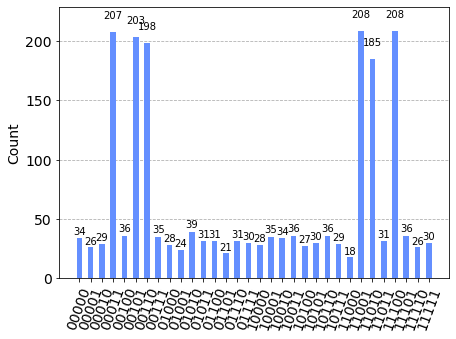

In [25]:
qasm_simulator = Aer.get_backend('qasm_simulator')

job = execute(qa, qasm_simulator, shots = 2000)
counts = job.result().get_counts(qa)

plot_histogram(counts)

Se probaron los 3 diferentes grupos que arroja y 00011 (11100) resultó ser el grupo con más aistas, 6. Sin embargo, se asumé que el algoritmo no está bien implementado debido a que no se separa por mucho de los otros dos siguientes grupos

<img src="https://github.com/BrianBarajas/Quantum_Computing_Codes/blob/main/ProblemasResueltos_QuiPu_Lab/imagen_2023-08-17_034210008.png?raw=true">

### Problema 8, sección 2.

Tenemos que  ket de estados deseables está dado por $|A\rangle = \frac{1}{\sqrt{a}} \sum_{x \epsilon A} |x\rangle$ donde $a$ representa la cantidad de estados deseables. \
Con $|\psi_3 \rangle = R(2\theta)|S\rangle$ y el estado final representado por $|\psi_f \rangle = R(2K\theta)|S\rangle$ \
Y como queremos que nuestro estado final coincida con el ket $|A\rangle$ por lo que el coeficiente de $|B\rangle$ debe ser cero y el de $|A\rangle$ debe ser uno. \
Esto implica que $2k\theta + \theta = \frac{\pi}{2}$, que implica $k=\frac{\pi}{4\theta} - \frac{1}{2}$. Y haciendo una aproximación para anguloss pequeños $$\theta \approx \sqrt{\frac{a}{2^n}}$$
Con $k$ igual a $k \approx \frac{\pi}{4}\sqrt{\frac{2^n}{a}}$

In [7]:
def k(n,a):
    K = (pi/4)* ((2**n)/a)**(1/2)
    return K
K = k(5,4)
print("El circuito del oraculo y el difusor debe ejecutarse " + str(K) + " veces")

El circuito del oraculo y el difusor debe ejecutarse 2.221441469079183 veces


### Extra 1, sección 2

($\textbf{Aclaración}$ Empecé el problema en donde están las letras en rojo, después seguí en donde están las lestras en azul (abajo) y lo terminé en la parte de arriba con las letras en negro)


<img src="https://github.com/BrianBarajas/Quantum_Computing_Codes/blob/main/ProblemasResueltos_QuiPu_Lab/Extra1.jpg?raw=true">

## Clase 6:

9.- La implementación de QFT se probó preparando el estado de Fourier $|\widetilde{5}\rangle$ para el cual $\text{QFT}^{\dagger}|\widetilde{5}\rangle= |101\rangle$. Intenta encontrar el estado $|a\rangle$ tal que $\text{QFT}^{\dagger}|a\rangle = |100\rangle$.

10.- Encuentra el estado $|b\rangle$ tal que $\text{QFT}^{\dagger}|b\rangle = |011\rangle$.

Extra 3. Intente escribir la función QFT sin recursividad. Utilice el simulador unitario de Qiskit para verificar sus resultados.

### Problema 9, sección 3.

El estado $|a\rangle$ que, aplicada la $\text{QFT}^\dagger$ te regresa el $|100\rangle$ es el $|\widetilde{4}\rangle$ tal que:
$$\text{QFT}^{\dagger}|\widetilde{4}\rangle= |100\rangle$$
Puesto que $100$ es el $4$ en binario

### Problema 10, sección 3.

El estado $|a\rangle$ que, aplicada la $\text{QFT}^\dagger$ te regresa el $|011\rangle$ es el $|\widetilde{3}\rangle$ tal que:
$$\text{QFT}^{\dagger}|\widetilde{3}\rangle= |011\rangle$$
Puesto que $011$ es el $3$ en binario

## 5. Recursos útiles

* Los notebooks y sus referencias.

## Donaciones
<br>
<center>
Puedes donar una vez en el siguiente enlace (Ko-Fi):

<br>
    
*Click en la imagen.*

<a href="https://ko-fi.com/rcrdphysics">
<img src="https://habrastorage.org/webt/8r/ml/xf/8rmlxfpdzukegpxa62cxlfvgkqe.png" width=20% />

</center>